In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
train_dataset_path = '/kaggle/input/mhealth-img112/classified_data/train'
validation_dataset_path = '/kaggle/input/mhealth-img112/classified_data/val'

In [3]:
IMG_WIDTH = 369
IMG_HEIGHT = 369
BATCH_SIZE = 32

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 5223 images belonging to 13 classes.


In [5]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 2230 images belonging to 13 classes.


In [6]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : 1
1 : 10
2 : 11
3 : 12
4 : 13
5 : 2
6 : 3
7 : 4
8 : 5
9 : 6
10 : 7
11 : 8
12 : 9


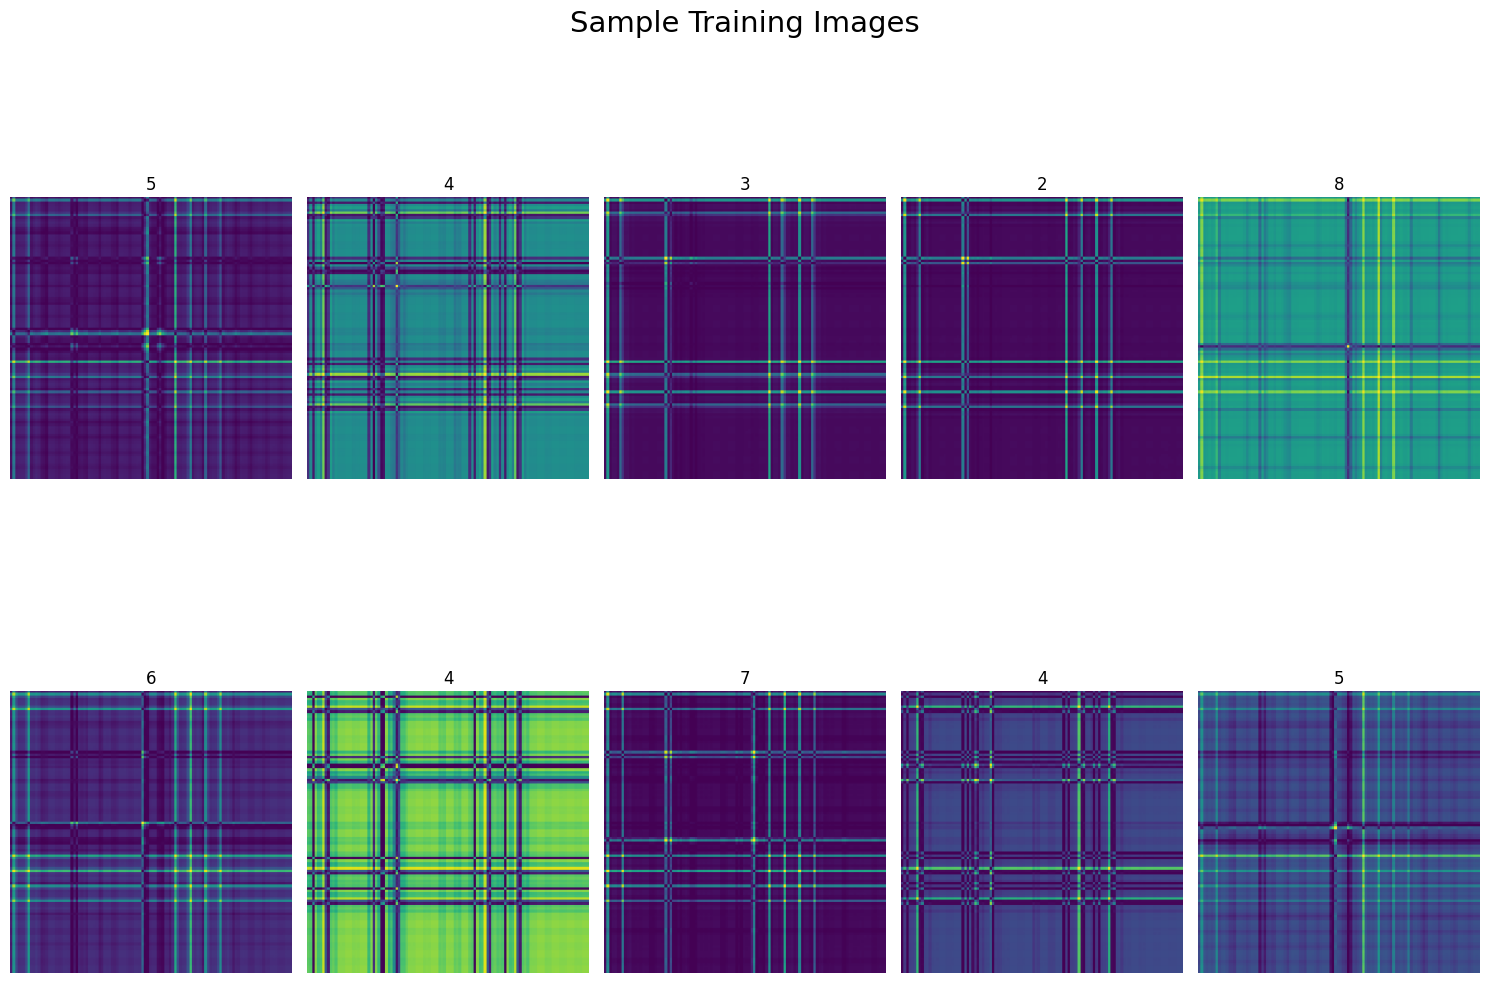

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
%matplotlib inline

In [9]:
basemodel =InceptionResNetV2(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(369, 369, 3)))

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
headmodel = basemodel.output
headmodel = MaxPooling2D(pool_size = (3,3))(headmodel)
headmodel = Dense(128, activation = "relu")(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(13, activation = 'softmax')(headmodel)
model = Model(inputs = basemodel.input, outputs = headmodel)

In [11]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 369, 369,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 184, 184,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 184, 184,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 184, 184,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 182, 182,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 182, 182,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 182, 182,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 182, 182,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 182, 182,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 182, 182,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 90, 90,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 90, 90,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 90, 90,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 90, 90,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 88, 88,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 88, 88,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 88, 88,    │          0 │ batch_normalizat

 Total params: 54,548,461 (208.09 MB)

 Trainable params: 54,487,917 (207.85 MB)

 Non-trainable params: 60,544 (236.50 KB)

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [13]:
optimizer = Adam(learning_rate=0.0001)

In [14]:
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [15]:
history = model.fit(train_generator, epochs=25, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/25


I0000 00:00:1726619463.324133     121 service.cc:145] XLA service 0x7c7840003760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726619463.324202     121 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-09-18 00:31:42.201613: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[192,80,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,80,90,90]{3,2,1,0}, f32[32,192,88,88]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-09-18 00:31:42.518434: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.316948469s
Trying algorithm eng0{} for conv (f32[192,80,3

164/164 - 437s - 3s/step - accuracy: 0.9205 - loss: 0.2613 - val_accuracy: 0.7668 - val_loss: 0.8308 - learning_rate: 1.0000e-04
Epoch 2/25
164/164 - 139s - 846ms/step - accuracy: 0.9795 - loss: 0.0565 - val_accuracy: 0.8717 - val_loss: 0.4724 - learning_rate: 1.0000e-04
Epoch 3/25
164/164 - 139s - 845ms/step - accuracy: 0.9853 - loss: 0.0425 - val_accuracy: 0.8982 - val_loss: 0.2200 - learning_rate: 1.0000e-04
Epoch 4/25
164/164 - 139s - 846ms/step - accuracy: 0.9891 - loss: 0.0359 - val_accuracy: 0.9013 - val_loss: 0.2562 - learning_rate: 1.0000e-04
Epoch 5/25
164/164 - 139s - 847ms/step - accuracy: 0.9946 - loss: 0.0150 - val_accuracy: 0.9076 - val_loss: 0.2199 - learning_rate: 1.0000e-04
Epoch 6/25
164/164 - 139s - 849ms/step - accuracy: 0.9923 - loss: 0.0301 - val_accuracy: 0.8758 - val_loss: 0.4079 - learning_rate: 1.0000e-04
Epoch 7/25
164/164 - 139s - 848ms/step - accuracy: 0.9950 - loss: 0.0180 - val_accuracy: 0.9332 - val_loss: 0.1977 - learning_rate: 1.0000e-04
Epoch 8/25
16

In [16]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [17]:
learning_rate = history.history['learning_rate']

In [18]:
print(f"Train Accuracy:     {max(train_accuracy)}")
print(f"Val Accuracy: {max(val_accuracy)}")

Train Accuracy:     1.0
Val Accuracy: 0.9636771082878113


In [19]:
print(f"Train Loss:     {train_loss[24]}")
print(f"Val Loss: {val_loss[24]}")

Train Loss:     6.924875197000802e-05
Val Loss: 0.19583505392074585


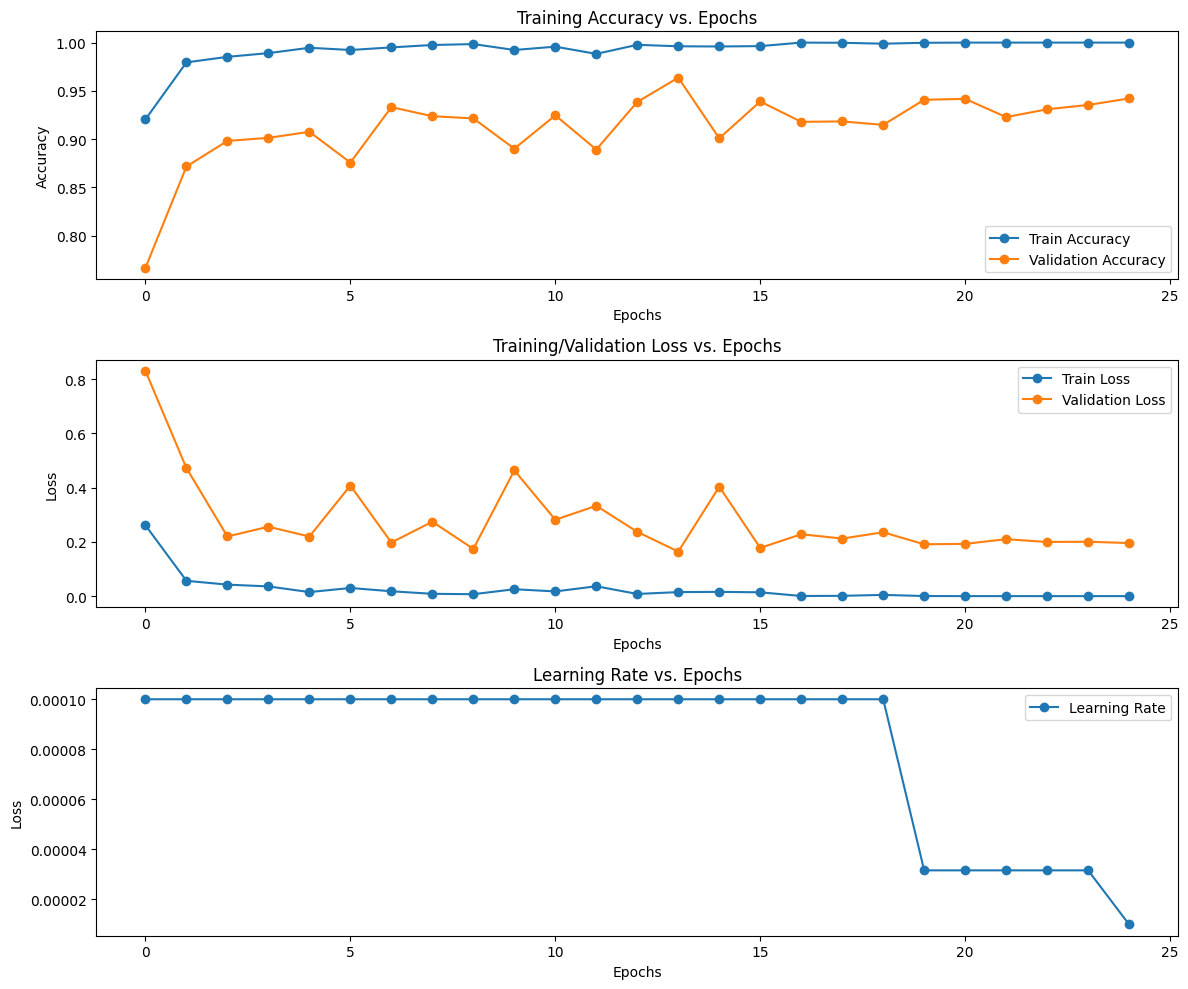

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [21]:
test_dataset = '/kaggle/input/mhealth-img112/classified_data/val'

In [22]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 2230 images belonging to 13 classes.


In [23]:
predictions = model.predict(test_generator)

70/70 ━━━━━━━━━━━━━━━━━━━━ 39s 403ms/step


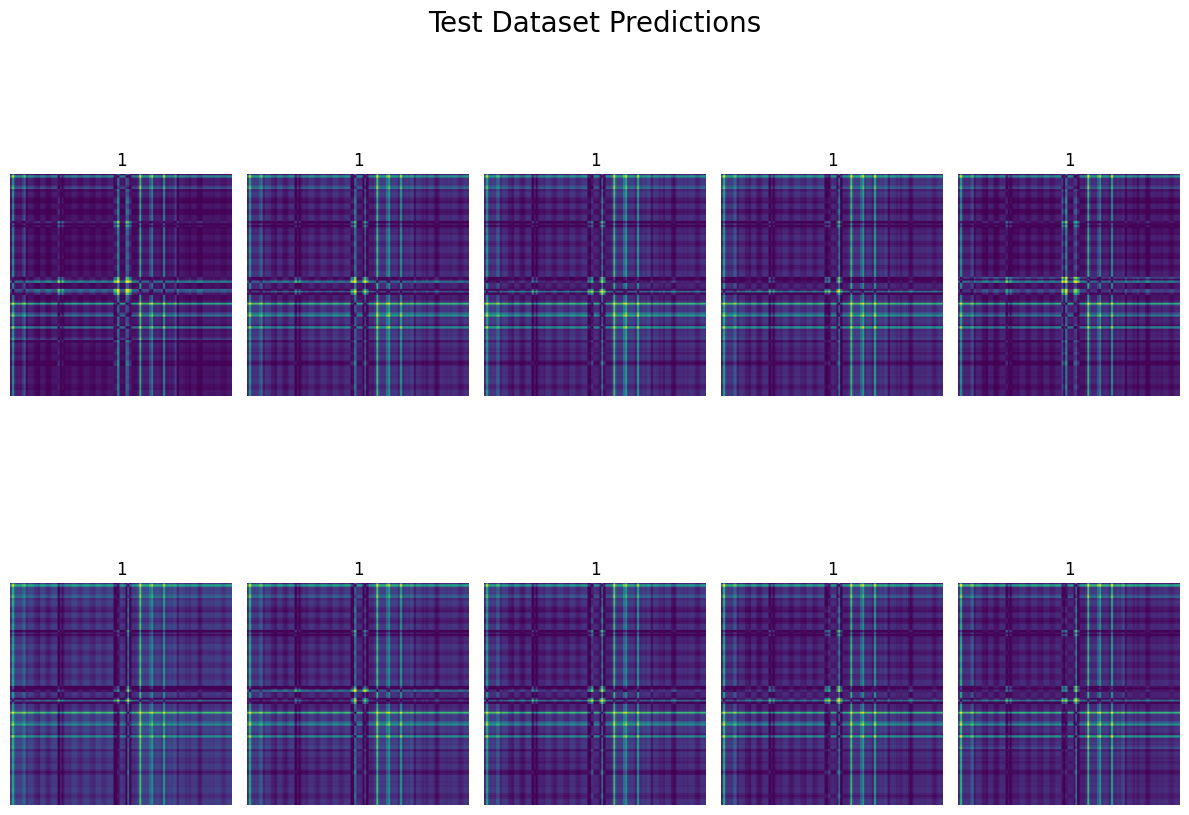

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [25]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)

70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 238ms/step - accuracy: 0.9460 - loss: 0.1890


In [26]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.19583506882190704
Test Accuracy: 0.9421524405479431


In [27]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

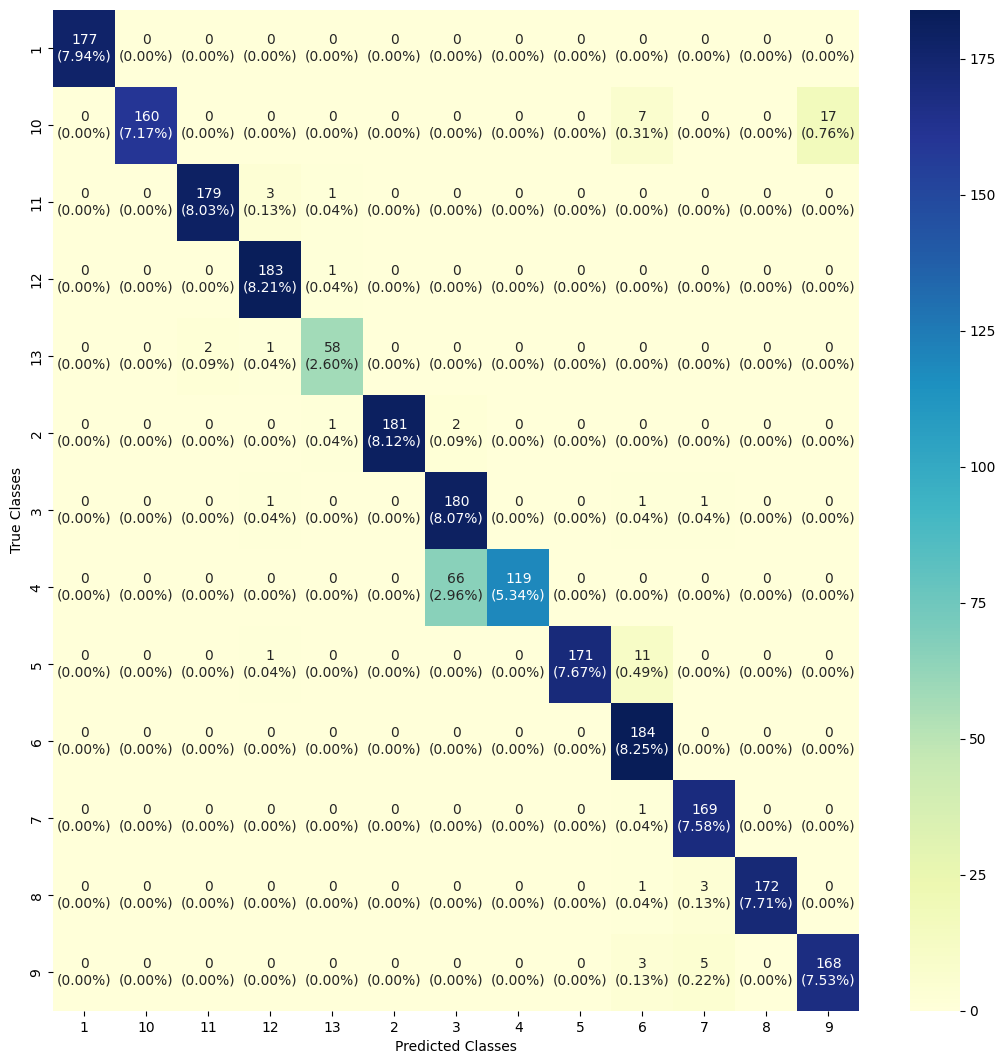

In [30]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(13, 13)

plt.figure(figsize = (13, 13))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [31]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       177
          10       1.00      0.87      0.93       184
          11       0.99      0.98      0.98       183
          12       0.97      0.99      0.98       184
          13       0.95      0.95      0.95        61
           2       1.00      0.98      0.99       184
           3       0.73      0.98      0.84       183
           4       1.00      0.64      0.78       185
           5       1.00      0.93      0.97       183
           6       0.88      1.00      0.94       184
           7       0.95      0.99      0.97       170
           8       1.00      0.98      0.99       176
           9       0.91      0.95      0.93       176

    accuracy                           0.94      2230
   macro avg       0.95      0.94      0.94      2230
weighted avg       0.95      0.94      0.94      2230



In [32]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [33]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]

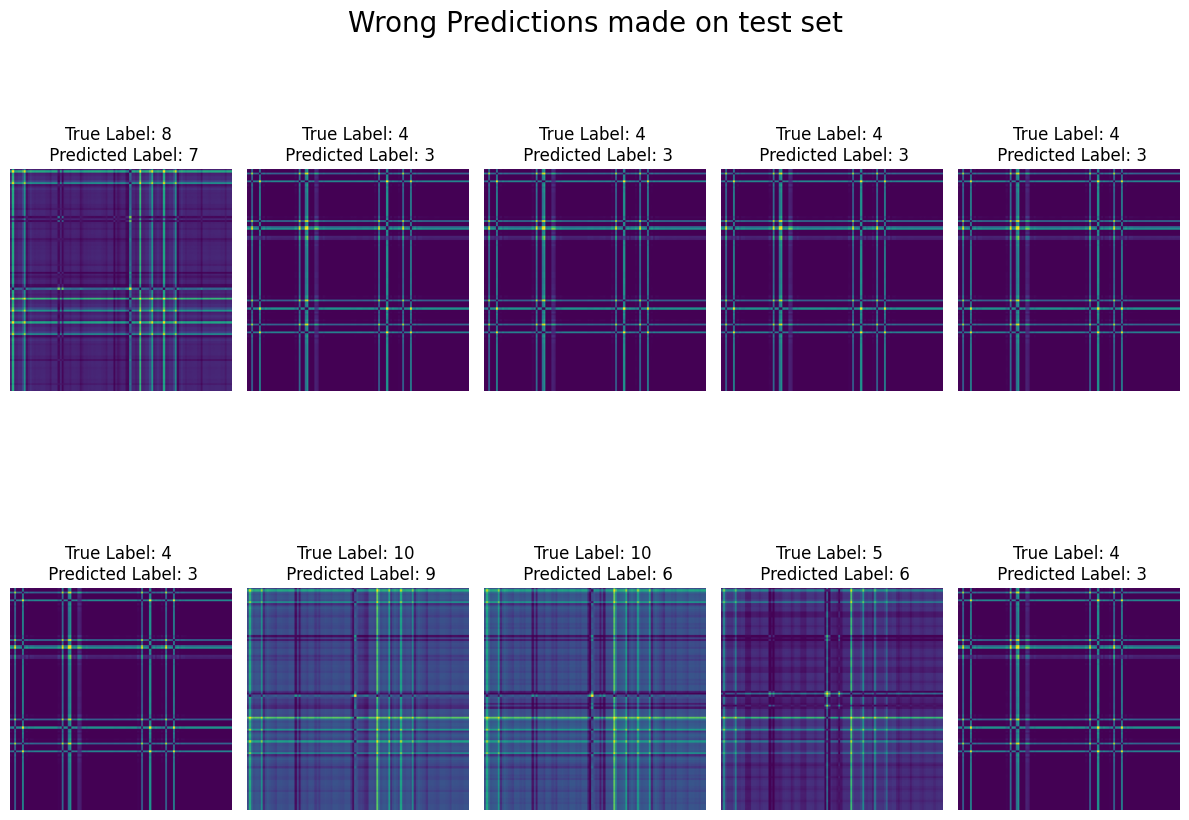

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_dataset, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

In [35]:
import glob
cv_img1 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/train/1/*.png"):
    n= cv2.imread(img)
    cv_img1.append(n)
cv_img2 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/train/2/*.png"):
    n= cv2.imread(img)
    cv_img2.append(n)
cv_img3 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/train/3/*.png"):
    n= cv2.imread(img)
    cv_img3.append(n)
cv_img4 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/train/4/*.png"):
    n= cv2.imread(img)
    cv_img4.append(n)
cv_img5 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/train/5/*.png"):
    n= cv2.imread(img)
    cv_img5.append(n)
cv_img6 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/train/6/*.png"):
    n= cv2.imread(img)
    cv_img6.append(n)
cv_img7 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/train/7/*.png"):
    n= cv2.imread(img)
    cv_img7.append(n)
cv_img8 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/train/8/*.png"):
    n= cv2.imread(img)
    cv_img8.append(n)
cv_img9 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/train/9/*.png"):
    n= cv2.imread(img)
    cv_img9.append(n)
cv_img10 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/train/10/*.png"):
    n= cv2.imread(img)
    cv_img10.append(n)
cv_img11 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/train/11/*.png"):
    n= cv2.imread(img)
    cv_img11.append(n)
cv_img12 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/train/12/*.png"):
    n= cv2.imread(img)
    cv_img12.append(n)
cv_img13 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/train/13/*.png"):
    n= cv2.imread(img)
    cv_img13.append(n)

In [36]:
arr1 = np.array(cv_img1)
arr2 = np.array(cv_img2)
arr3 = np.array(cv_img3)
arr4 = np.array(cv_img4)
arr5 = np.array(cv_img5)
arr6 = np.array(cv_img6)
arr7 = np.array(cv_img7)
arr8 = np.array(cv_img8)
arr9 = np.array(cv_img9)
arr10 = np.array(cv_img10)
arr11 = np.array(cv_img11)
arr12 = np.array(cv_img12)
arr13 = np.array(cv_img13)

In [37]:
print(arr1.shape)
print(arr2.shape)
print(arr3.shape)
print(arr4.shape)
print(arr5.shape)
print(arr6.shape)
print(arr7.shape)
print(arr8.shape)
print(arr9.shape)
print(arr10.shape)
print(arr11.shape)
print(arr12.shape)
print(arr13.shape)

(413, 369, 369, 3)
(432, 369, 369, 3)
(428, 369, 369, 3)
(433, 369, 369, 3)
(429, 369, 369, 3)
(431, 369, 369, 3)
(397, 369, 369, 3)
(412, 369, 369, 3)
(412, 369, 369, 3)
(430, 369, 369, 3)
(430, 369, 369, 3)
(432, 369, 369, 3)
(144, 369, 369, 3)


In [38]:
train_data=np.concatenate([arr1,arr2,arr3,arr4,arr5,arr6,arr7,arr8,arr9,arr10,arr11,arr12,arr13],axis=0)

In [39]:
layer_output = model.get_layer('flatten').output
intermediate_model= Model(inputs=model.input, outputs=layer_output)
feature_extractor_irnv2=intermediate_model.predict(train_data)

164/164 ━━━━━━━━━━━━━━━━━━━━ 52s 256ms/step


In [40]:
feature_extractor_irnv2.shape

(5223, 1152)

In [41]:
import pandas as pd
df=pd.DataFrame(feature_extractor_irnv2)
df.to_csv('mhealth_img112_irnv2_1152_train.csv',index=False)

In [42]:
Y1= np.full((413, 1), 1)
print(Y1.shape)
print(Y1[0])
Y2= np.full((432, 1), 2)
Y3= np.full((428, 1), 3)
Y4= np.full((433, 1), 4)
Y5= np.full((429, 1), 5)
Y6= np.full((431, 1), 6)
Y7= np.full((397, 1), 7)
Y8= np.full((412, 1), 8)
Y9= np.full((412, 1), 9)
Y10= np.full((430, 1), 10)
Y11= np.full((430, 1), 11)
Y12= np.full((432, 1), 12)
Y13= np.full((144, 1), 13)

(413, 1)
[1]


In [43]:
Y=np.concatenate([Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13],axis=0)
print(Y.shape)

(5223, 1)


In [44]:
import pandas as pd
dfy=pd.DataFrame(Y)
dfy.to_csv('Y_mhealth_train.csv',index=False)

In [45]:
import glob
cv_img1 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/val/1/*.png"):
    n= cv2.imread(img)
    cv_img1.append(n)
cv_img2 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/val/2/*.png"):
    n= cv2.imread(img)
    cv_img2.append(n)
cv_img3 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/val/3/*.png"):
    n= cv2.imread(img)
    cv_img3.append(n)
cv_img4 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/val/4/*.png"):
    n= cv2.imread(img)
    cv_img4.append(n)
cv_img5 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/val/5/*.png"):
    n= cv2.imread(img)
    cv_img5.append(n)
cv_img6 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/val/6/*.png"):
    n= cv2.imread(img)
    cv_img6.append(n)
cv_img7 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/val/7/*.png"):
    n= cv2.imread(img)
    cv_img7.append(n)
cv_img8 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/val/8/*.png"):
    n= cv2.imread(img)
    cv_img8.append(n)
cv_img9 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/val/9/*.png"):
    n= cv2.imread(img)
    cv_img9.append(n)
cv_img10 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/val/10/*.png"):
    n= cv2.imread(img)
    cv_img10.append(n)
cv_img11 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/val/11/*.png"):
    n= cv2.imread(img)
    cv_img11.append(n)
cv_img12 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/val/12/*.png"):
    n= cv2.imread(img)
    cv_img12.append(n)
cv_img13 = []
for img in glob.glob("/kaggle/input/mhealth-img112/classified_data/val/13/*.png"):
    n= cv2.imread(img)
    cv_img13.append(n)

In [46]:
arr1 = np.array(cv_img1)
arr2 = np.array(cv_img2)
arr3 = np.array(cv_img3)
arr4 = np.array(cv_img4)
arr5 = np.array(cv_img5)
arr6 = np.array(cv_img6)
arr7 = np.array(cv_img7)
arr8 = np.array(cv_img8)
arr9 = np.array(cv_img9)
arr10 = np.array(cv_img10)
arr11 = np.array(cv_img11)
arr12 = np.array(cv_img12)
arr13 = np.array(cv_img13)

In [47]:
print(arr1.shape)
print(arr2.shape)
print(arr3.shape)
print(arr4.shape)
print(arr5.shape)
print(arr6.shape)
print(arr7.shape)
print(arr8.shape)
print(arr9.shape)
print(arr10.shape)
print(arr11.shape)
print(arr12.shape)
print(arr13.shape)

(177, 369, 369, 3)
(184, 369, 369, 3)
(183, 369, 369, 3)
(185, 369, 369, 3)
(183, 369, 369, 3)
(184, 369, 369, 3)
(170, 369, 369, 3)
(176, 369, 369, 3)
(176, 369, 369, 3)
(184, 369, 369, 3)
(183, 369, 369, 3)
(184, 369, 369, 3)
(61, 369, 369, 3)


In [48]:
test_data=np.concatenate([arr1,arr2,arr3,arr4,arr5,arr6,arr7,arr8,arr9,arr10,arr11,arr12,arr13],axis=0)

In [49]:
layer_output = model.get_layer('flatten').output
intermediate_model= Model(inputs=model.input, outputs=layer_output)
feature_extractor_irnv2_t=intermediate_model.predict(test_data)

70/70 ━━━━━━━━━━━━━━━━━━━━ 31s 321ms/step


In [50]:
feature_extractor_irnv2_t.shape

(2230, 1152)

In [51]:
dfv=pd.DataFrame(feature_extractor_irnv2_t)
dfv.to_csv('mhealth_img112_irnv2_1152_val.csv',index=False)

In [52]:
Y1= np.full((177, 1), 1)
print(Y1.shape)
print(Y1[0])
Y2= np.full((184, 1), 2)
Y3= np.full((183, 1), 3)
Y4= np.full((185, 1), 4)
Y5= np.full((183, 1), 5)
Y6= np.full((184, 1), 6)
Y7= np.full((170, 1), 7)
Y8= np.full((176, 1), 8)
Y9= np.full((176, 1), 9)
Y10= np.full((184, 1), 10)
Y11= np.full((183, 1), 11)
Y12= np.full((184, 1), 12)
Y13= np.full((61, 1), 13)

(177, 1)
[1]


In [53]:
Y=np.concatenate([Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13],axis=0)
print(Y.shape)

(2230, 1)


In [ ]:
import pandas as pd
dfyt=pd.DataFrame(Y)
dfyt.to_csv('Y_mhealth_train.csv',index=False)